# Heart Disease Study

In [16]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(broom)
library(faux)
library(binom)
library(ggplot2)
library(GGally)

## Data

In this project we will use the dataset Cleveland_data which contains the variables related to heart diease from UC Irvine Machine Learning Repository. We find to find out the difference variables' effect on statistical models. This dataset is collected from Cleveland and published in 1988 June 30th.

In this dataset, there are 3 types of vectors; double vectors, character vectors and integer vector. The "goal" field refers to the presense of the heart disease in the patient. There are 303 observations with 14 variables represented in this data. This dataset is focused on health and medicine domain.

In [17]:
Cleveland_data <- read.csv("data/processed.cleveland.data")

colnames(Cleveland_data) <- c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num")
head(Cleveland_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


- `age` : (integer) age of patient in years.
- `sex` : (categorical) sex of patient (1 = male; 0 = female).
- `cp` : (categorical) chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic). 
- `trestbps` : (integer) resting blood pressure (in mm Hg on admission to the hospital).
- `chol` : (integer) serum cholestoral in mg/dl.
- `fbs` : (categorical) fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- `restecg` : (categorical) resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria).
- `thalach` : (integer) maximum heart rate achieved.
- `exang` : (categorical) exercise induced angina (1 = yes; 0 = no).
- `oldpeak` : (integer) ST depression induced by exercise relative to rest.
- `slope` : (categorical) the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping).
- `ca` :(integer) number of major vessels (0-3) colored by flourosopy.
- `thal` : (categorical) 3 = normal; 6 = fixed defect; 7 = reversable defect.
- `num` : (integer) presence of heart disease in the patient (0 = absence; 1,2,3,4 = presence).

## Question

- Are age `age`, maximum heart rate `thalach`, blood pressure`trestbps` (explanatory variabels) statistically associated with presence of heart disease `num` (variable of response)? 

This question is focused on inference. From the imported dataset, select the explanatory variables to form a multiple linear regression using hypothesis test to determine the statistical significance, also can see is there a interaction between age and blood pressure by regression model.

## Clean and wrangle the data. 
Mutate the variable `num` into `heartdiease` with a value whether presence or absence.

In [18]:
Cleveland_data$num <-  ifelse(Cleveland_data$num %in% c(1, 2, 3, 4), "Presence", "Absence") 
Cleveland_data <- rename(Cleveland_data, heartdisease = num)
head(Cleveland_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,Absence
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,Absence
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,Presence


## Visualization

We can use boxplot to find out if there is significant differences in each vairable based on presence or absence of heart diease.

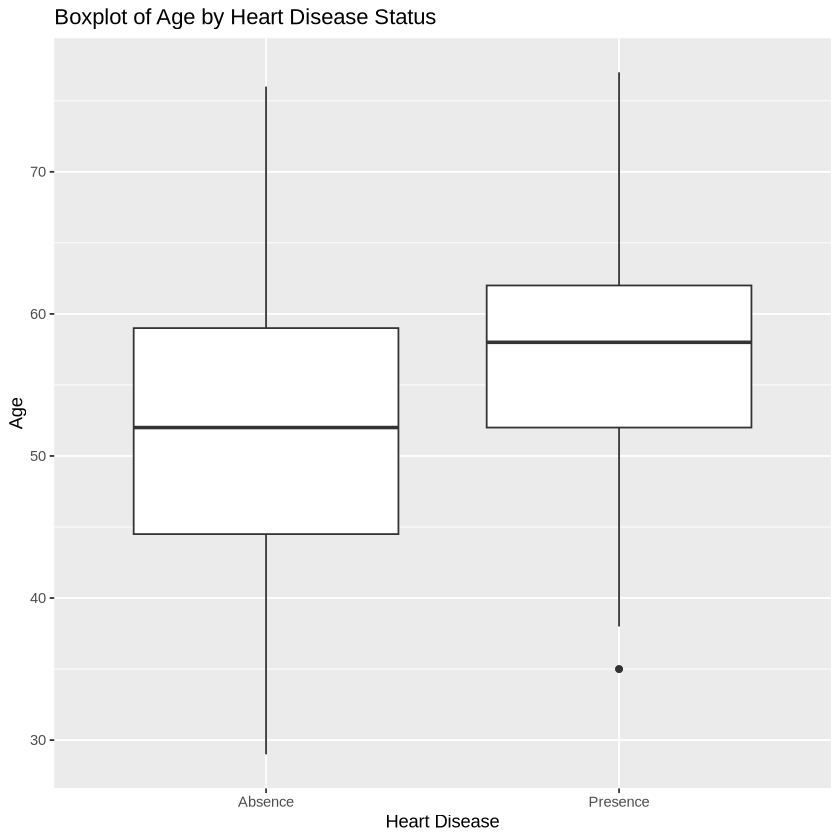

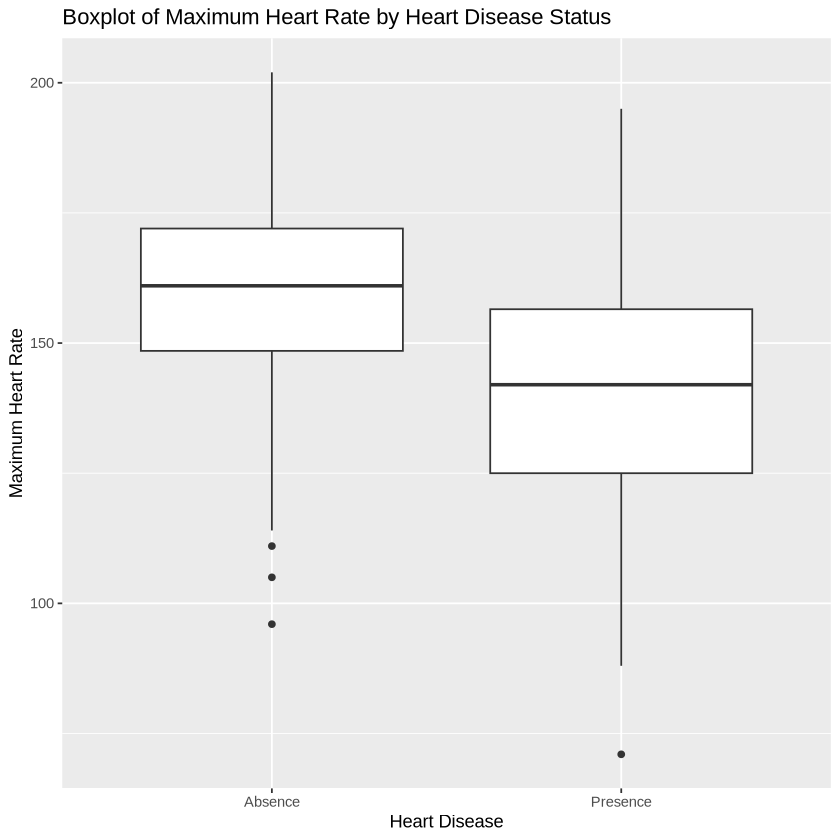

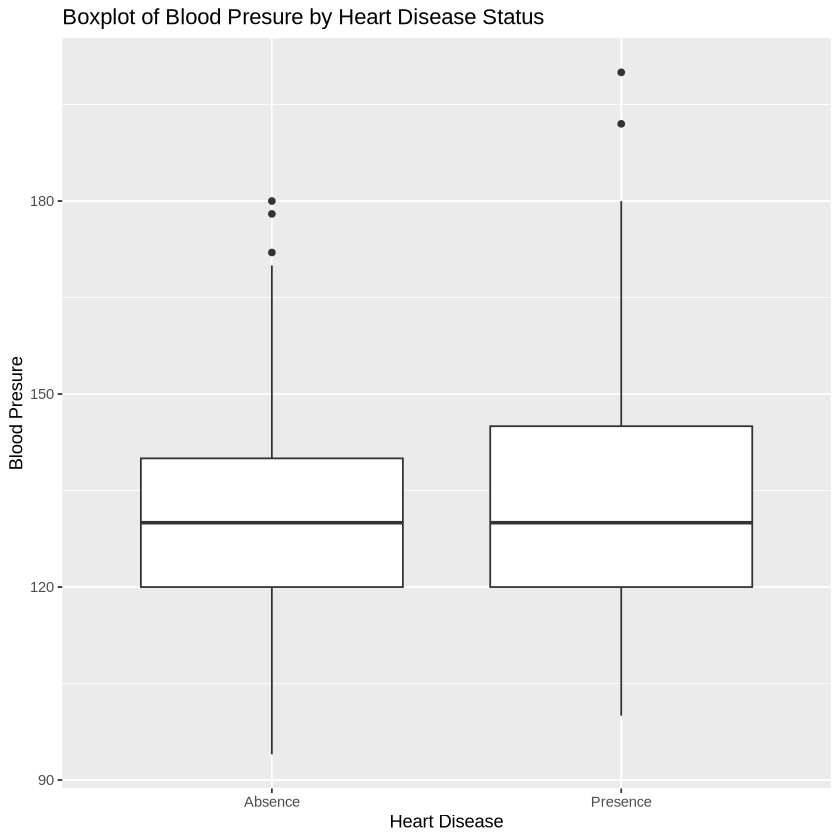

In [19]:
boxplot_age <- ggplot(Cleveland_data, aes(x = heartdisease, y = age)) +
geom_boxplot() +
labs(x = "Heart Disease", y = "Age") + 
ggtitle("Boxplot of Age by Heart Disease Status")
boxplot_age
boxplot_thalach <- ggplot(Cleveland_data, aes(x = heartdisease, y = thalach)) +
geom_boxplot() +
labs(x = "Heart Disease", y = "Maximum Heart Rate") + 
ggtitle("Boxplot of Maximum Heart Rate by Heart Disease Status")
boxplot_thalach
boxplot_trestbps <- ggplot(Cleveland_data, aes(x = heartdisease, y = trestbps)) +
geom_boxplot() +
labs(x = "Heart Disease", y = "Blood Presure") + 
ggtitle("Boxplot of Blood Presure by Heart Disease Status")
boxplot_trestbps

From the boxplot visualization, we can catch the significant characteristic between the heart dieases status (presence or absence). By viewing the mean, interquartile range and distribution to estimate the relationship between explantory vairables and response variable. This helps us for futher modeling estimation.

## Method and Plan


Reminding the question, are age `age`, maximum heart rate `thalach`, blood pressure`trestbps` (explanatory variabels) statistically associated with presence of heart disease `num` (variable of response)? We want to infer these explanatory vairbles to interprete the response variable. From the data set, there are 14 variables and we only choose four of them, so others should be included into the error terms in our model that we hold other variables constant. From the course learnig so far, we can use the inference model to estitmate the proper relation between the explanartor variables and the response variable. 

Since we have three explanatory variables, the model should be multiple linear. So the multiple linear regression is a good method to achieve the goal. We can use some coding to set up the multiple linear regression model with selected explanatory vairables to the response vairables. While usting the original data, we can split it into training data and testing data to make sure our model efficient and accurate. Also, we want to find if these explanatory varialbes have significant statistically on their coefficients in the regression model. From the tidy summary we can estimate each explanatory variable's coefficient and p-value to determine if it is significant variable. Testing the R^2 to determine wheter the model is fit, the higher the adjusted R^2, the more success model we have. Also can use the ANOVA table to find each variable's p-value.

Assumption:
- 1. The sample data must be random selected from the population data. 
From this assumption, we make sure the model will be setted acuurate, and without the bias. Also we select the training and testing data set both by random selected using specific code in R.
- 2. There must be a linear relationship between the outcome variable and the independent variables. 
We want to make sure these variables are in linear to futher create a mutiple linear model.
- 3. The residuals are normally distributed.
There are residuals due to the estimate difference with the original data, and we want to set up the model based on these residuals are normally distributed.
- 4. The independent variables are not highly correlated with each other.  
There variable we choose would not be correlated with each others, since if they are highly correlated, we just only need choose one of them in our model for estimation. The correlation would effect the acuracy of the model.
- 5. Homoscedasticity, which means the variance of error terms is a constant.
We assume that the variance of the residuals is a constant by viewing the scatter plot, the distribution should not be like a "funnel" or others, this helps us to generate a more efficient regression line.

Potential limitations or weaknesses 
- There are many other variables in the data set, these may have affect on the response variable. We only choose three of the variables, others in the error terms may also has affect on the response variable.
- There may have imperfect multicollinearity which exists when the explanatory variables in an equation are correlated, but this correlation is less than perfect.
- There may have confounding variables which is a variable that influences both the dependent variable and independent variable.

## Computational Code and Output

We need to construct a response 𝑌𝑖 such that  𝑌𝑖=1 if the  𝑖th patient's heart dieases status is in presence, and  0 otherwise.
In the heartdisease column, replace the levels Presence and Absence with the numerical values 1 and 0, respectively.

In [20]:
Cleveland_data_log <- Cleveland_data %>% 
mutate(heartdisease = ifelse(heartdisease == "Presence", 1, 0))
head(Cleveland_data_log)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1


### Logistic Regression

In [21]:
log_regression <- glm(
       formula = heartdisease ~ age + thalach + trestbps,
       data = Cleveland_data_log,
       family = binomial)


In [22]:
tidy(log_regression, exponentiate = TRUE)%>% 
    mutate_if(is.numeric, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),28.507,1.627,2.059,0.039
age,1.010,0.016,0.609,0.542
thalach,0.959,0.007,-6.086,0.000
trestbps,1.017,0.008,2.209,0.027


From the summary, we can know that the p-value of thalach and trestbps are less than 0.05, so these variables are statistically significance, but age's p-value is 0.5424 which is larger than 0.05, so it is not statistically significance.

Since 1/0.959 = 1.0428, we estimate that the odds of absence heart dieases are 4.28% increase as thalach increase 1 unit, while keeping the rest of the input variables constant.

A 1 unit increase in trestbps, is associated with a  1.7% increase in the odds of a patient to have presence of heart dieases, while keeping the rest of the input variables constant.



In [23]:
log_regression2 <- glm(
       formula = heartdisease ~  thalach + trestbps,
       data = Cleveland_data_log,
       family = binomial)

summary(log_regression2)


Call:
glm(formula = heartdisease ~ thalach + trestbps, family = binomial, 
    data = Cleveland_data_log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0436  -0.9179  -0.5629   1.0082   1.9733  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.909372   1.349520   2.897  0.00377 ** 
thalach     -0.043591   0.006577  -6.627 3.42e-11 ***
trestbps     0.018593   0.007433   2.501  0.01238 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 416.75  on 301  degrees of freedom
Residual deviance: 353.20  on 299  degrees of freedom
AIC: 359.2

Number of Fisher Scoring iterations: 3


The new regression with thalach and trestbps are statistically significant since their p-value are both less than 0.05, thus this is the better regression model address the question of interest. We can use this model to predict the heart dieases status.